In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Glass\Glass_AL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,NaN,0.48,NaN,0.00,0.0
2,1.51618,13.53,3.55,NaN,72.99,0.39,NaN,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,NaN,8.44,NaN,0.0
212,1.51651,14.38,0.00,1.94,NaN,0.00,NaN,1.57,0.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	10
float64		column 2	0
float64		column 3	5
float64		column 4	16
float64		column 5	10
float64		column 6	10
float64		column 7	20
float64		column 8	21
float64		column 9	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,204.000000,214.000000,209.000000,198.000000,204.000000,204.000000,194.000000,193.000000,214.000000
mean,1.518364,13.407850,2.680478,1.443788,72.647206,0.503480,8.950052,0.154197,0.057009
std,0.002950,0.816604,1.442442,0.504222,0.785776,0.657909,1.420025,0.464899,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516545,12.907500,2.090000,1.190000,72.275000,0.130000,8.272500,0.000000,0.000000
50%,1.517685,13.300000,3.480000,1.365000,72.800000,0.560000,8.605000,0.000000,0.000000
75%,1.519153,13.825000,3.600000,1.630000,73.092500,0.610000,9.140000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


<AxesSubplot:>

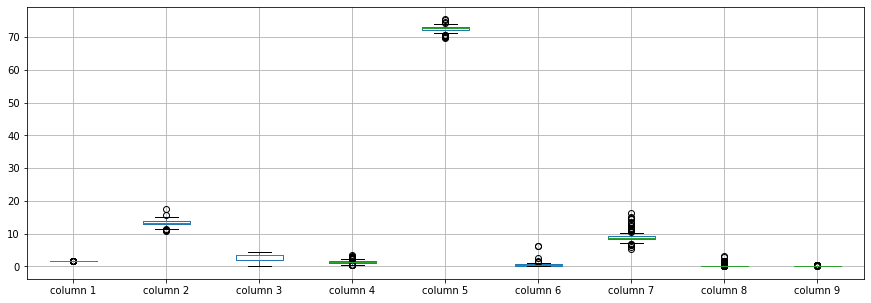

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1     1.518364
column 2    13.407850
column 3     2.680478
column 4     1.443788
column 5    72.647206
column 6     0.503480
column 7     8.950052
column 8     0.154197
column 9     0.057009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,-0.137117,-0.079692,-0.422491,-0.569317,-0.276637,0.806543,0.076364,0.115455
column 2,-0.137117,1.000000,-0.300253,0.138021,-0.071554,-0.279696,-0.267008,0.288727,-0.241346
column 3,-0.079692,-0.300253,1.000000,-0.474552,-0.170775,-0.019693,-0.408322,-0.499218,0.109717
column 4,-0.422491,0.138021,-0.474552,1.000000,-0.022080,0.362797,-0.278195,0.426403,-0.069645
column 5,-0.569317,-0.071554,-0.170775,-0.022080,1.000000,-0.199780,-0.288684,-0.089356,-0.091444
column 6,-0.276637,-0.279696,-0.019693,0.362797,-0.199780,1.000000,-0.290480,-0.072529,-0.008846
column 7,0.806543,-0.267008,-0.408322,-0.278195,-0.288684,-0.290480,1.000000,-0.062286,0.126771
column 8,0.076364,0.288727,-0.499218,0.426403,-0.089356,-0.072529,-0.062286,1.000000,-0.015044
column 9,0.115455,-0.241346,0.109717,-0.069645,-0.091444,-0.008846,0.126771,-0.015044,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+20,9+20+20,9+20+20+20,9+20+20+20+20,9+20+20+20+20+20,9+20+20+20+20+20+20,9+20+20+20+20+20,9+20+20+20+20,9+20+20+20,9+20+20,9+20,9], vae_layer = False, seed = 9)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 97.73766209528996
Epoch: 1 , loss: 98.10783855731671
Epoch: 2 , loss: 97.75346022385817
Epoch: 3 , loss: 97.74353907658504
Epoch: 4 , loss: 97.616455078125
Epoch: 5 , loss: 98.17504530686598
Epoch: 6 , loss: 97.74083533653847
Epoch: 7 , loss: 97.95371363713191
Epoch: 8 , loss: 97.63815718430739
Epoch: 9 , loss: 98.02777040921725
Epoch: 10 , loss: 97.55585068922777
Epoch: 11 , loss: 97.5868888268104
Epoch: 12 , loss: 97.66519106351413
Epoch: 13 , loss: 97.6921609731821
Epoch: 14 , loss: 97.6167479294997
Epoch: 15 , loss: 98.3548325758714
Epoch: 16 , loss: 97.9866462120643
Epoch: 17 , loss: 97.58905733548679
Epoch: 18 , loss: 97.65896254319411
Epoch: 19 , loss: 97.55694697453426
Epoch: 20 , loss: 97.63189051701472
Epoch: 21 , loss: 97.59951547475961
Epoch: 22 , loss: 97.64302825927734
Epoch: 23 , loss: 97.59476764385516
Epoch: 24 , loss: 98.00076587383563
Epoch: 25 , loss: 97.58713120680589
Epoch: 26 , lo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(214, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     1.51966
column 2    14.77000
column 3     3.75000
column 4     0.29000
column 5    72.02000
column 6     0.03000
column 7     9.00000
column 8     0.00000
column 9     0.00000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Glass.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.000000,-72.703286,0.000000,-7.803437,0.000000,0.0
2,0.0,0.0,0.0,-1.515999,0.000000,0.000000,-7.755950,0.000000,0.0
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
210,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
211,0.0,0.0,0.0,0.000000,0.000000,0.023881,0.000000,-1.627469,0.0
212,0.0,0.0,0.0,0.000000,-73.586349,0.000000,-8.456394,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(233.76305505149074, 1090.4359815890969)

In [17]:
NRMS=numerator/denominator
NRMS


0.21437577170814454

In [18]:
new_df.iloc[66,:]

column 1     1.521520
column 2    13.050000
column 3     3.650000
column 4     0.870000
column 5    72.220000
column 6     0.024967
column 7     9.850000
column 8     0.012931
column 9     0.170000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,1.52101,13.64,4.49,1.100000,71.780000,0.060000,8.750000,0.000000,0.0
1,1.51761,13.89,3.60,1.360000,0.026714,0.480000,0.026563,0.000000,0.0
2,1.51618,13.53,3.55,0.024001,72.990000,0.390000,0.024050,0.000000,0.0
3,1.51766,13.21,3.69,1.290000,72.610000,0.570000,8.220000,0.000000,0.0
4,1.51742,13.27,3.62,1.240000,73.080000,0.550000,8.070000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.880000,72.610000,0.080000,9.180000,1.060000,0.0
210,1.51685,14.92,0.00,1.990000,73.060000,0.000000,8.400000,1.590000,0.0
211,1.52065,14.36,0.00,2.020000,73.420000,0.023881,8.440000,0.012531,0.0
212,1.51651,14.38,0.00,1.940000,0.023651,0.000000,0.023606,1.570000,0.0


In [20]:
imputations[-1].to_excel("Glass_AL_5(imp).xlsx", index=False, header=False)